In [1]:
import numpy as np 
import pandas as pd 
from scipy.special import softmax

# visualizatioion pkg 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys 
sys.path.append("..") 
from utils.viz import viz 
viz.get_style()

eps_ = 1e-13
max_ = 1e+13

## Humans' performance in the stable task 

This note aims at answering one question? How do humans perform in the stable task? We seek evidence to support the following two hypotheses:

* H1: they are able to match the truth probability in the environment (Converge on the real probability).
* H2: they are more deterministic than than the truth probability. 


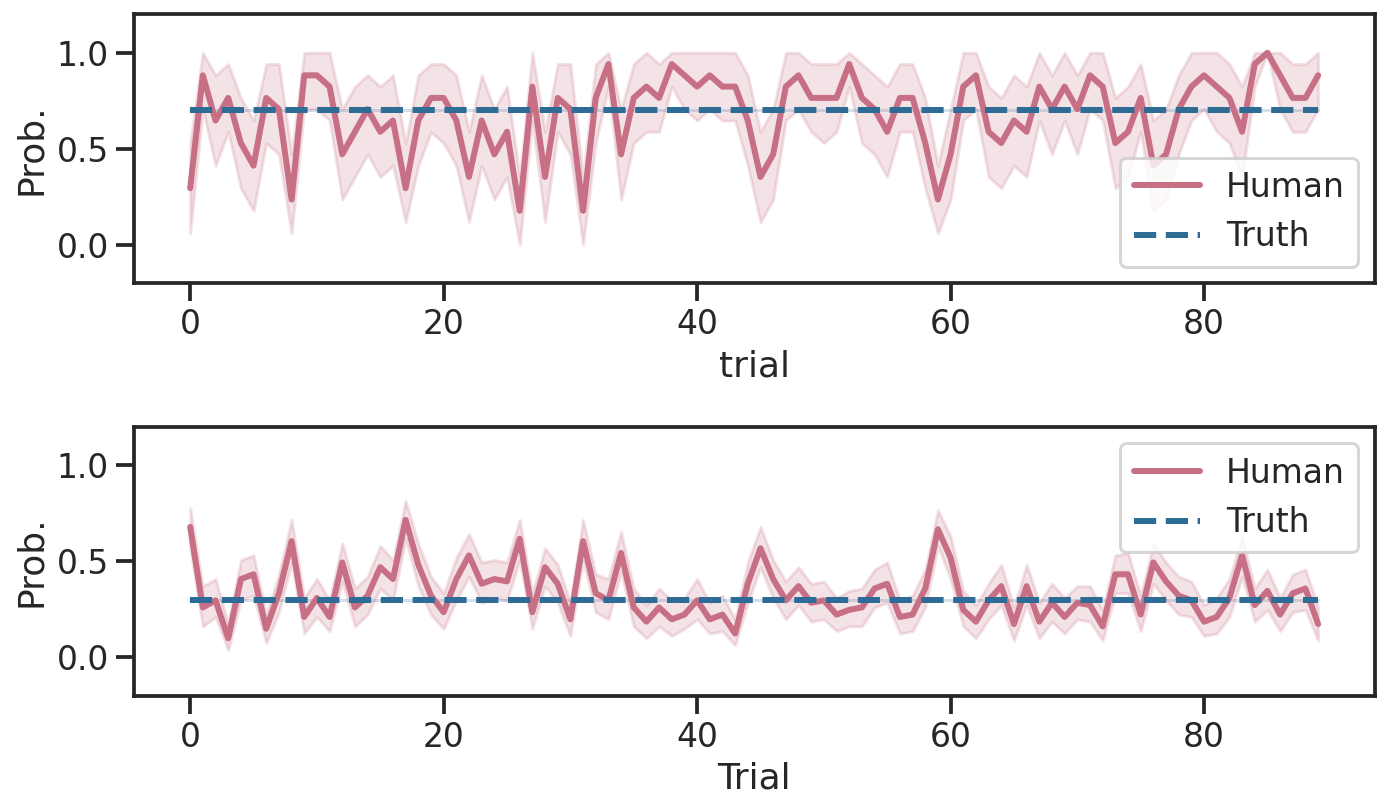

In [2]:
data_set = 'rew_con'
probs    = [.7, .3]

fname = f'../data/{data_set}.csv'
data  = pd.read_csv(fname)

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
for i, prob in enumerate(probs):
    ax = axs[i]
    sel_data = data.query(f'p_true=={prob} & exp_type=="stab_first" & b_type=="stable"')
    sns.lineplot(x='trial', y='action', data=sel_data,
                    color=viz.Red, lw=3, 
                    ax=ax, label='Human') 
    sns.lineplot(x='trial', y='p_true', data=sel_data,
                    color=viz.Blue, ls='--', lw=3,
                    ax=ax, label='Truth')
    ax.legend()
    if i: ax.set_xlabel('Trial')
    ax.set_ylim([-.2, 1.2])
    ax.set_ylabel('Prob.')
fig.tight_layout()
    

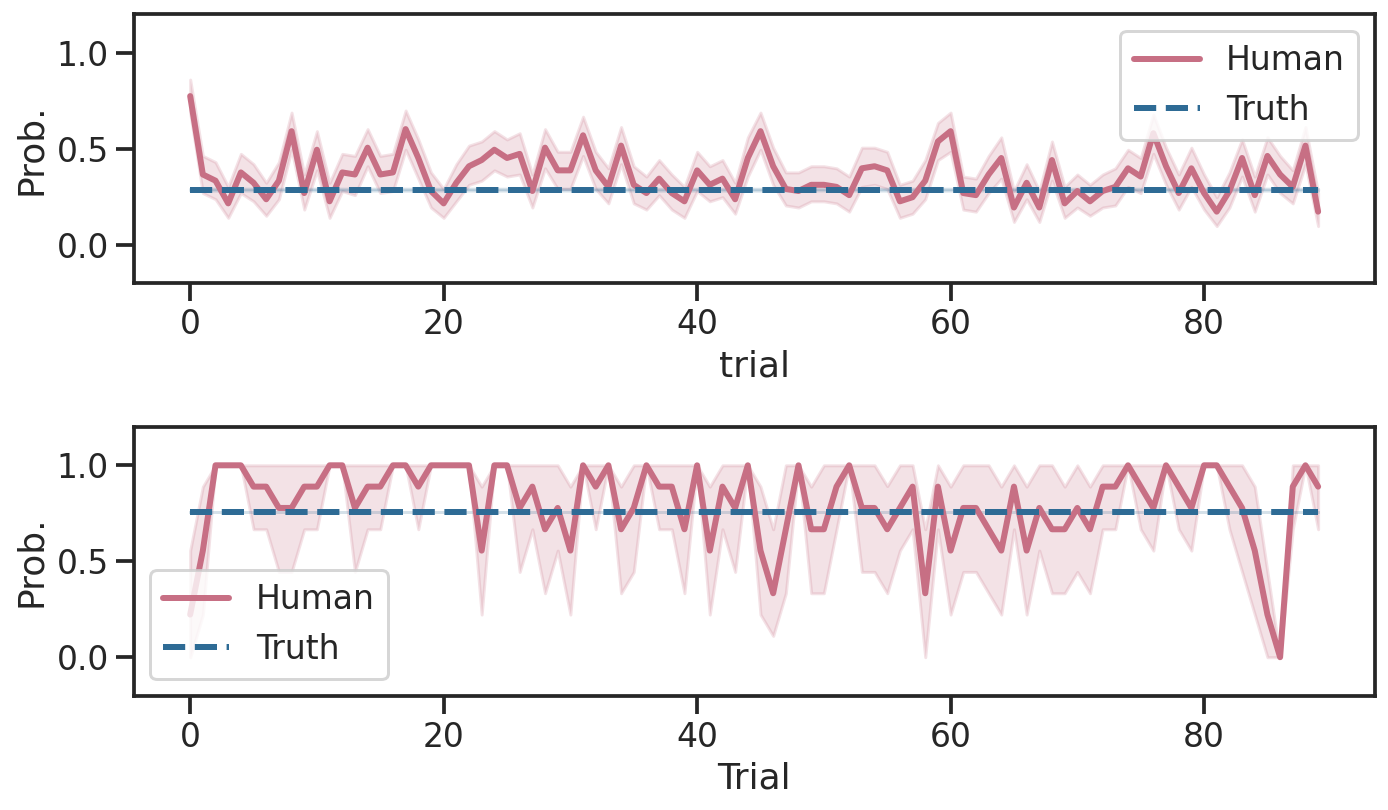

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
for i, prob in enumerate(probs):
    ax = axs[i]
    sel_data = data.query(f'seq=={prob} & exp_type=="vol_first" & b_type=="stable"')
    sns.lineplot(x='trial', y='action', data=sel_data,
                    color=viz.Red, lw=3, 
                    ax=ax, label='Human') 
    sns.lineplot(x='trial', y='p_true', data=sel_data,
                    color=viz.Blue, ls='--', lw=3,
                    ax=ax, label='Truth')
    ax.legend()
    if i: ax.set_xlabel('Trial')
    ax.set_ylim([-.2, 1.2])
    ax.set_ylabel('Prob.')
fig.tight_layout()

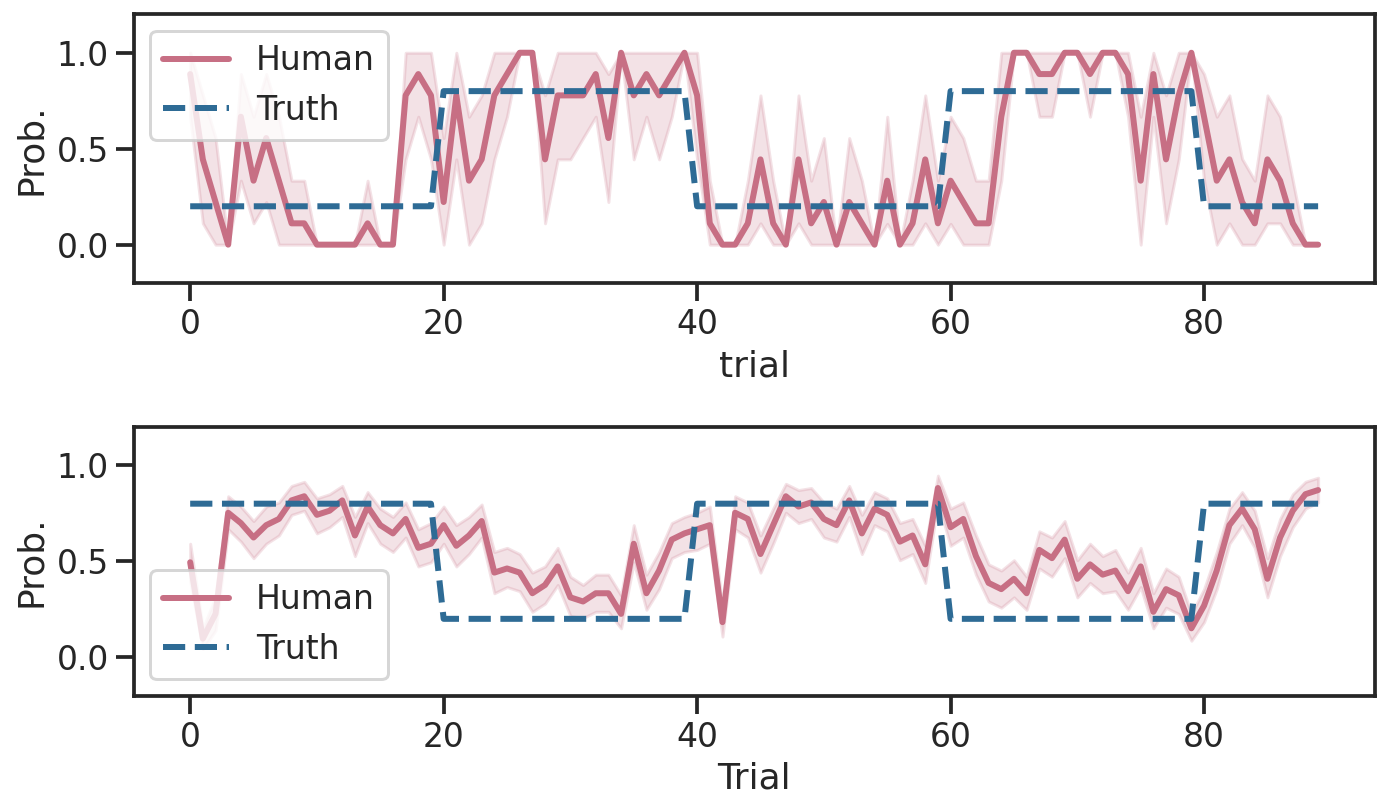

In [4]:
probs = [0, 1]
probTrials = [[.2]*20+[.8]*20+[.2]*20+[.8]*20+[.2]*10,
              [.8]*20+[.2]*20+[.8]*20+[.2]*20+[.8]*10,]
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
for i, prob in enumerate(probs):
    ax = axs[i]
    sel_data = data.query(f'seq=={prob} & exp_type=="vol_first" & b_type=="volatile"')
    sns.lineplot(x='trial', y='action', data=sel_data,
                    color=viz.Red, lw=3, 
                    ax=ax, label='Human') 
    sns.lineplot(x=range(90), y=probTrials[i],
                    color=viz.Blue, ls='--', lw=3,
                    ax=ax, label='Truth')
    ax.legend()
    if i: ax.set_xlabel('Trial')
    ax.set_ylim([-.2, 1.2])
    ax.set_ylabel('Prob.')
fig.tight_layout()

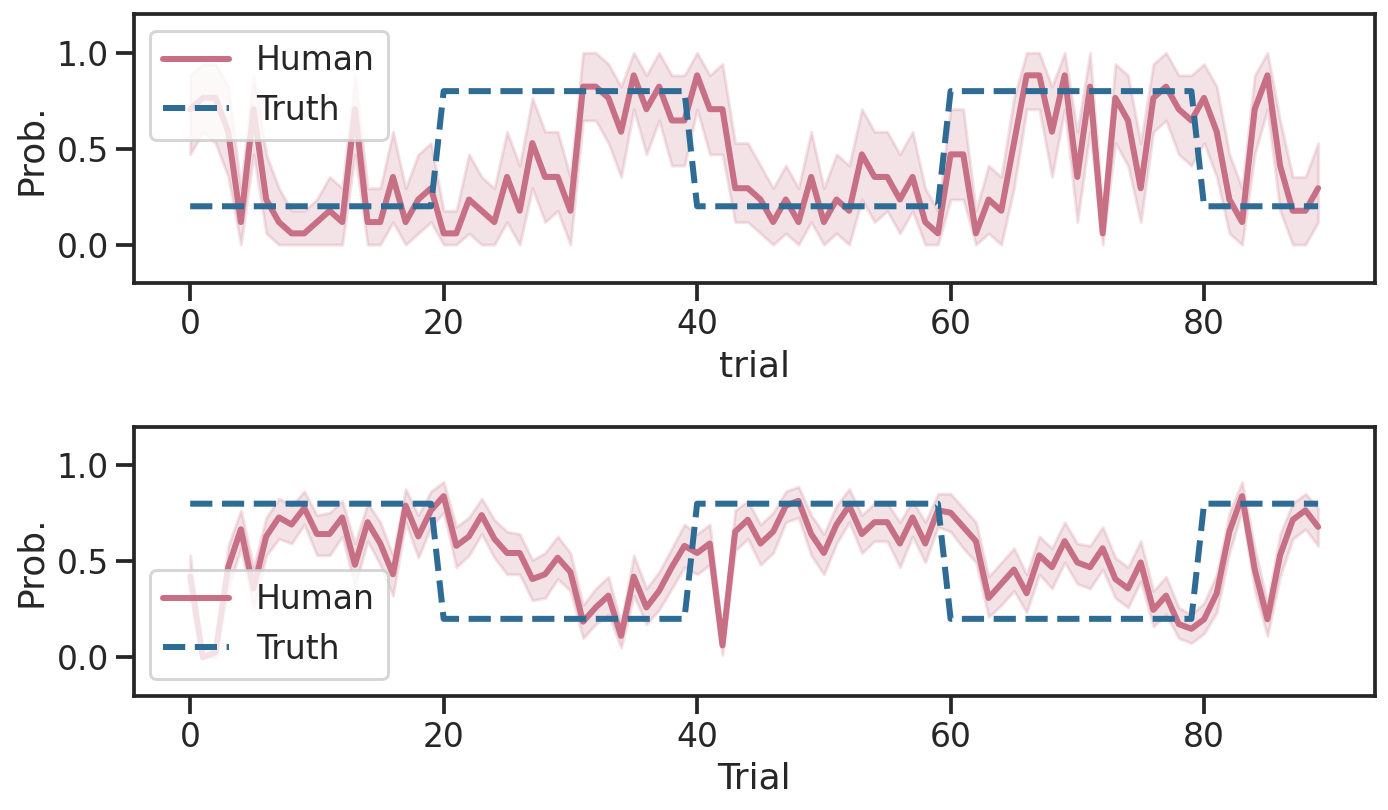

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharey=True)
for i, prob in enumerate(probs):
    ax = axs[i]
    sel_data = data.query(f'seq=={prob} & exp_type=="stab_first" & b_type=="volatile"')
    sns.lineplot(x='trial', y='action', data=sel_data,
                    color=viz.Red, lw=3, 
                    ax=ax, label='Human') 
    sns.lineplot(x=range(90), y=probTrials[i],
                    color=viz.Blue, ls='--', lw=3,
                    ax=ax, label='Truth')
    ax.legend()
    if i: ax.set_xlabel('Trial')
    ax.set_ylim([-.2, 1.2])
    ax.set_ylabel('Prob.')
fig.tight_layout()